In [ ]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Carregar arquivo

In [ ]:
df_train = pd.read_csv('train.csv', delimiter = ";")
df_test = pd.read_csv('test.csv', delimiter = ";")

In [ ]:
#descriptive statistics summary
df_train['NU_NOTA_MT'].describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

Text(0.5, 1.0, 'Price Distribution')

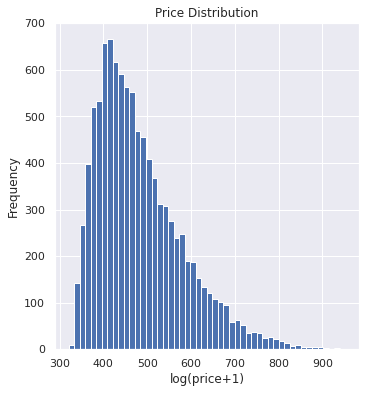

In [ ]:
#histogram
plt.subplot(1, 2, 2)
np.log(df_train['NU_NOTA_MT']+1).plot.hist(bins=50, figsize=(12,6), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Price Distribution', fontsize=12)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


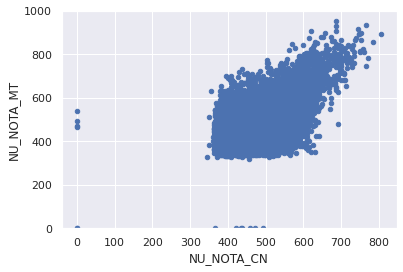

In [ ]:
#scatter plot grlivarea/saleprice
var = 'NU_NOTA_CN'
data = pd.concat([df_train['NU_NOTA_MT'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='NU_NOTA_MT', ylim=(0,1000));

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df_train['TP_SEXO'] = labelencoder.fit_transform(df_train['TP_SEXO'])

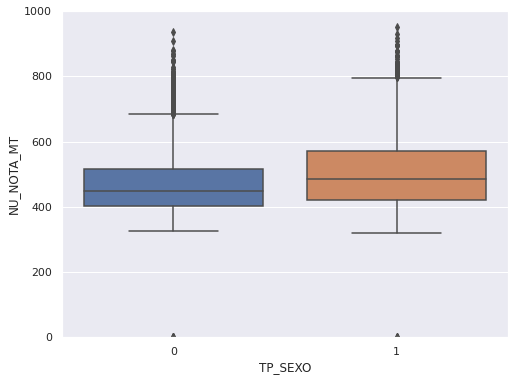

In [ ]:
#box plot overallqual/saleprice
var = 'TP_SEXO'
data = pd.concat([df_train['NU_NOTA_MT'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="NU_NOTA_MT", data=data)
fig.axis(ymin=0, ymax=1000);

In [ ]:
# Assigning numerical values and storing in another column
df_train['CO_UF_RESIDENCIA'] = labelencoder.fit_transform(df_train['CO_UF_RESIDENCIA'])
df_train['SG_UF_RESIDENCIA'] = labelencoder.fit_transform(df_train['SG_UF_RESIDENCIA'])
df_train['Q001'] = labelencoder.fit_transform(df_train['Q001'])
df_train['Q002'] = labelencoder.fit_transform(df_train['Q002'])
df_train['Q006'] = labelencoder.fit_transform(df_train['Q006'])
df_train['Q024'] = labelencoder.fit_transform(df_train['Q024'])
df_train['Q025'] = labelencoder.fit_transform(df_train['Q025'])
#df_train['Q027'] = labelencoder.fit_transform(df_train['Q027'])
df_train['Q047'] = labelencoder.fit_transform(df_train['Q047'])

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'NU_NOTA_MT')['NU_NOTA_MT']
print(cols)

NU_NOTA_MT                1.000000
NU_NOTA_CN                0.584941
NU_NOTA_CH                0.529594
NU_NOTA_LC                0.494695
NU_NOTA_REDACAO           0.379376
TP_DEPENDENCIA_ADM_ESC    0.373233
NU_NOTA_COMP3             0.350307
Q047                      0.349257
NU_NOTA_COMP5             0.343337
NU_NOTA_COMP4             0.342282
Name: NU_NOTA_MT, dtype: float64


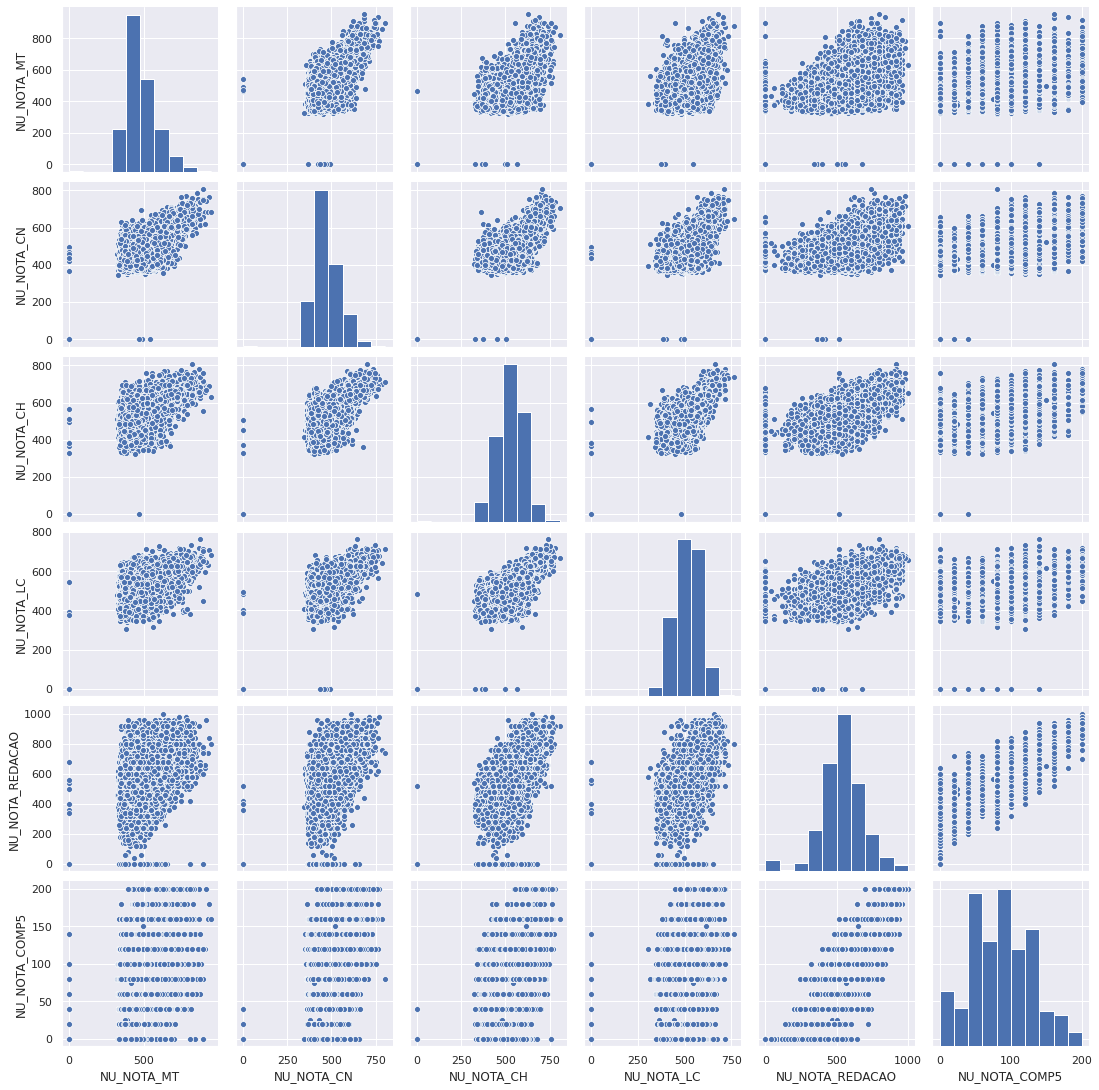

In [ ]:
#scatterplot
sns.set()
cols = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP5']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [ ]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
TP_DEPENDENCIA_ADM_ESC,9448,0.688128
TP_ENSINO,9448,0.688128
Q027,7373,0.536999
NU_NOTA_COMP4,3597,0.261981
NU_NOTA_COMP1,3597,0.261981
NU_NOTA_LC,3597,0.261981
NU_NOTA_MT,3597,0.261981
NU_NOTA_REDACAO,3597,0.261981
NU_NOTA_COMP5,3597,0.261981
TP_STATUS_REDACAO,3597,0.261981


In [ ]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 5000]).index,1)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

3597

In [ ]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
NU_NOTA_COMP4,3597,0.261981
NU_NOTA_COMP3,3597,0.261981
NU_NOTA_LC,3597,0.261981
NU_NOTA_MT,3597,0.261981
TP_STATUS_REDACAO,3597,0.261981
NU_NOTA_COMP1,3597,0.261981
NU_NOTA_REDACAO,3597,0.261981
NU_NOTA_COMP5,3597,0.261981
NU_NOTA_COMP2,3597,0.261981
NU_NOTA_CH,3389,0.246832


In [ ]:
df_train['NU_NOTA_MT'].replace('', np.nan, inplace=True)

In [ ]:
df_train.dropna(subset=['NU_NOTA_MT'], inplace=True)

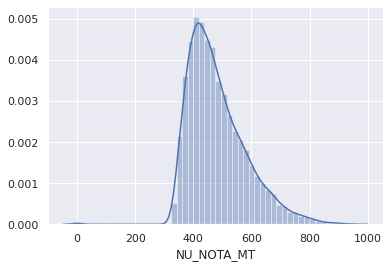

In [ ]:
#histogram
sns.distplot(df_train['NU_NOTA_MT']);

In [ ]:
 #standardizing data
notaMT_scaled = StandardScaler().fit_transform(df_train['NU_NOTA_MT'][:,np.newaxis]);
low_range = notaMT_scaled[notaMT_scaled[:,0].argsort()][:10]
high_range= notaMT_scaled[notaMT_scaled[:,0].argsort()][-10:]
print(notaMT_scaled)
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

[[-0.83246608]
 [-0.22738539]
 [-1.18209052]
 ...
 [-0.84649113]
 [-0.9606951 ]
 [-0.53693826]]
outer range (low) of the distribution:
[[-4.83361223]
 [-4.83361223]
 [-4.83361223]
 [-4.83361223]
 [-4.83361223]
 [-4.83361223]
 [-4.83361223]
 [-4.83361223]
 [-4.83361223]
 [-4.83361223]]

outer range (high) of the distribution:
[[4.13640846]
 [4.13741025]
 [4.14542456]
 [4.15243708]
 [4.27064821]
 [4.27766074]
 [4.34878777]
 [4.46800069]
 [4.53411878]
 [4.70342116]]


In [ ]:
df_train = df_train.drop(df_train[df_train['NU_NOTA_MT'] == 0].index)

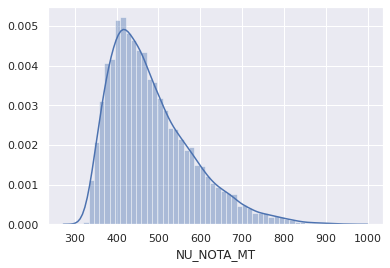

In [ ]:
#histogram
sns.distplot(df_train['NU_NOTA_MT']);

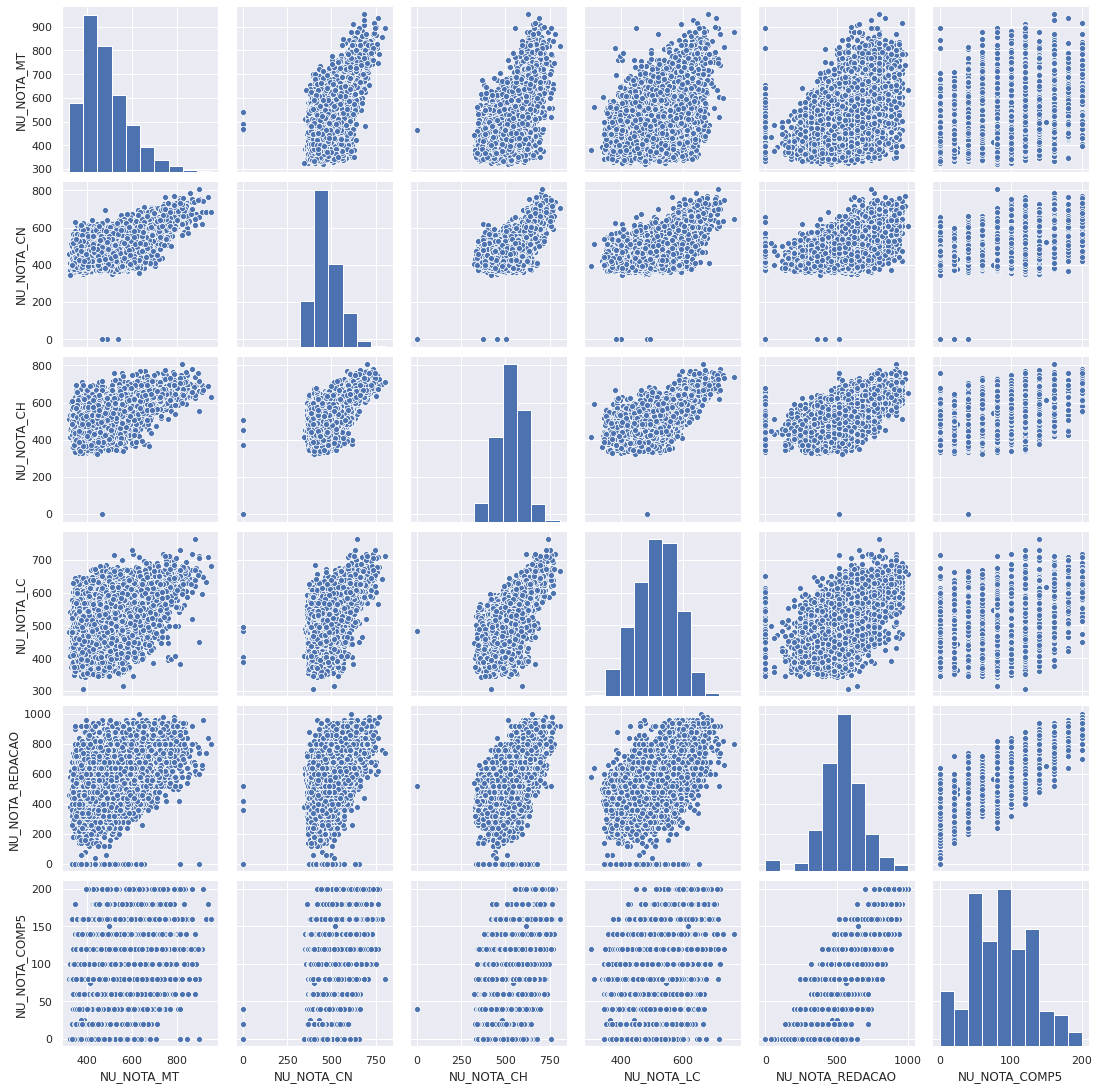

In [ ]:
#scatterplot
sns.set()
cols = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP5']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [ ]:
df_train = df_train.drop(df_train[df_train['NU_NOTA_CN'] == 0].index)
df_train = df_train.drop(df_train[df_train['NU_NOTA_CH'] == 0].index)
df_train = df_train.drop(df_train[df_train['NU_NOTA_LC'] == 0].index)


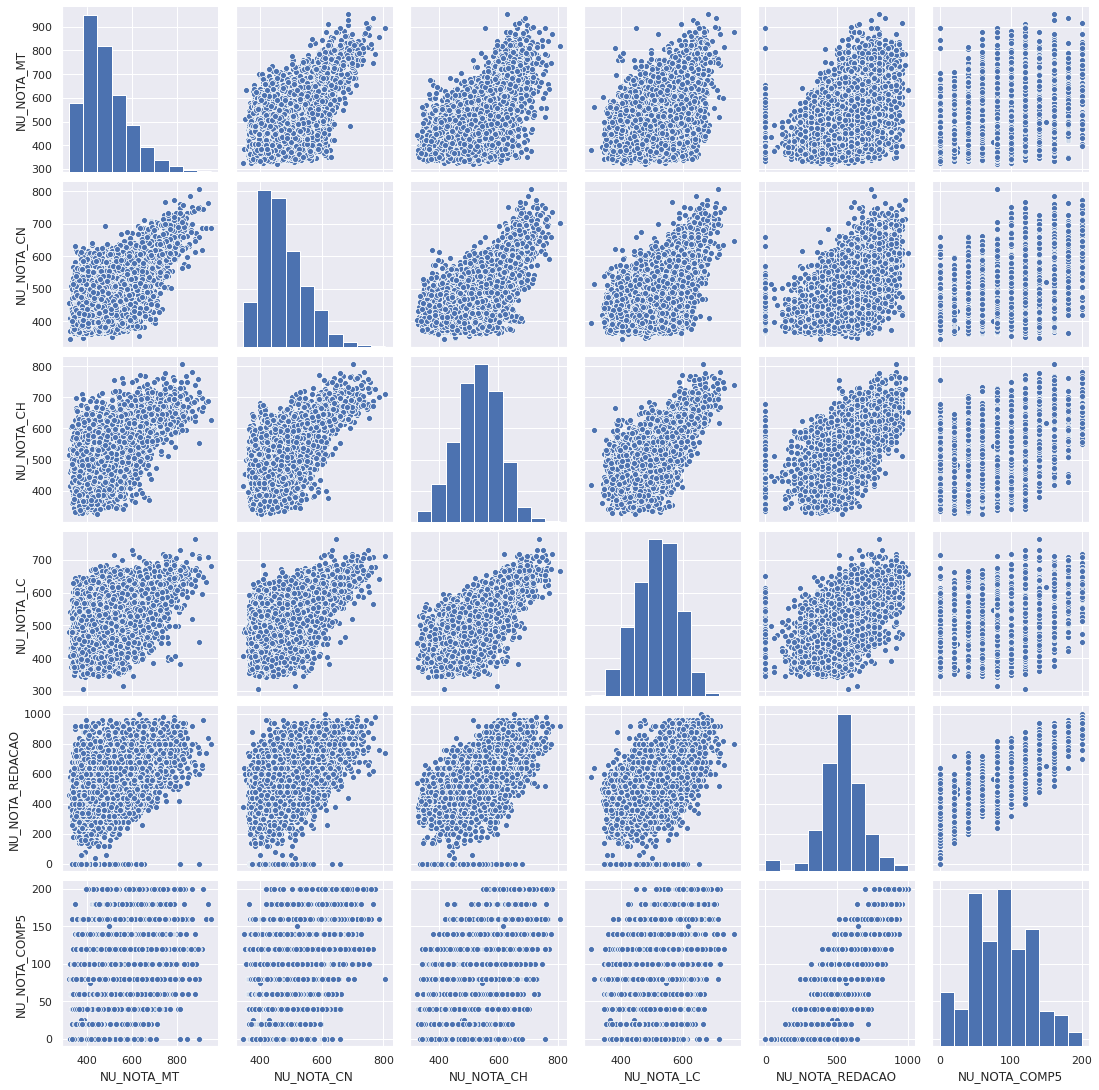

In [ ]:
#scatterplot
sns.set()
cols = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP5']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_train['NU_NOTA_MT'].skew())
print("Kurtosis: %f" % df_train['NU_NOTA_MT'].kurt())


Skewness: 1.053870
Kurtosis: 1.043572


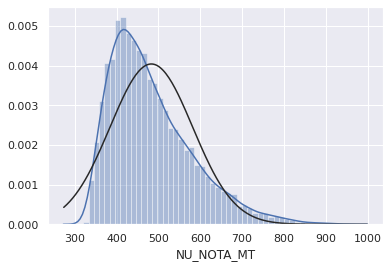

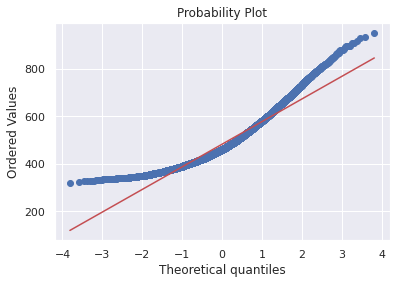

In [ ]:
#histogram and normal probability plot
sns.distplot(df_train['NU_NOTA_MT'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['NU_NOTA_MT'], plot=plt)